# DS323 - Final Lab

In [ ]:
import sklearn
from sklearn import preprocessing
# Import SVC from sklearn.svm here
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


### Load data

In [ ]:
data = pd.read_csv("/content/heart-2.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Find Minimum and Maximum value for each feature

In [ ]:
#Find
min_values = data.min()
max_values = data.max()

#Print
print("Minimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)

Minimum values:
age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
target        0.0
dtype: float64

Maximum values:
age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64


### Set features and output

In [ ]:
X = data.iloc[:,0:13].values
Y = data.iloc[:,13].values

### Using Hold Out

In [ ]:
# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42, stratify=Y)

In [ ]:
# Fit SVC() model with training data
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions for test data
y_pred = model.predict(X_test)

In [ ]:
# Print training and testing accuracy
print('Training Accuracy : {:.3f}'.format(model.score(X_train, y_train)))
print('Test Accuracy : {:.3f}'.format(model.score(X_test, y_test)))

Training Accuracy : 0.686
Test Accuracy : 0.705


### Using Data Preprocessing

In [ ]:
# Scale your data using preprocessing.MinMaxScaler()
mm_scaler = preprocessing.MinMaxScaler()
X_mm = mm_scaler.fit_transform(X)

In [ ]:
# Split your pre-processed data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_mm, Y, test_size = 0.3, random_state=42, stratify=Y)

In [ ]:
# Fit model with the pre-processed training data
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions for the pre-processed test data
y_pred = model.predict(X_test)

In [ ]:
# Print training and testing accuracy
print('Training Accuracy : {:.3f}'.format(model.score(X_train, y_train)))
print('Test Accuracy : {:.3f}'.format(model.score(X_test, y_test)))

Training Accuracy : 0.911
Test Accuracy : 0.886


### Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Set the parameters for the SVC model
param_grid = {'C': [0.01, 0.1, 1, 10],
                  'gamma': [1, 10, 100]}
print("Parameter grid:{}".format(param_grid))
grid_search = GridSearchCV(SVC(), param_grid, cv=10)

Parameter grid:{'C': [0.01, 0.1, 1, 10], 'gamma': [1, 10, 100]}


In [ ]:
# Build your GridSearchCV with the parameters' setting
grid_search = GridSearchCV(SVC(), param_grid, cv=10)

In [ ]:
# Split your pre-processed data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X_mm, Y, test_size = 0.3, random_state=42, stratify=Y)

In [ ]:
# Split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=42)

In [ ]:
# Train your GridSearchCV
print(grid_search.fit(X_train, y_train))

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [1, 10, 100]})


In [ ]:
# Print the best parameters
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'C': 10, 'gamma': 10}


In [ ]:
# Print the best score on cross-validation
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best cross-validation score: 0.95


In [ ]:
# Rebuild the SVC model with the best parameters on the combined training and validation set,
# and evaluate it on the test set
svmc = grid_search.best_estimator_
svmc.fit(X_trainval, y_trainval)
y_pred = svmc.predict(X_test)
training_score = svmc.score(X_trainval, y_trainval)
test_score = svmc.score(X_test, y_test)

In [ ]:
# Print training and testing accuracy
print("Training set score with best parameters: {:.2f}".format(training_score))
print("Test set score with best parameters: {:.2f}".format(test_score))

Training set score with best parameters: 1.00
Test set score with best parameters: 0.99


### Visualize the confusion matrix for the best model

Text(42.25, 0.5, 'Actual')

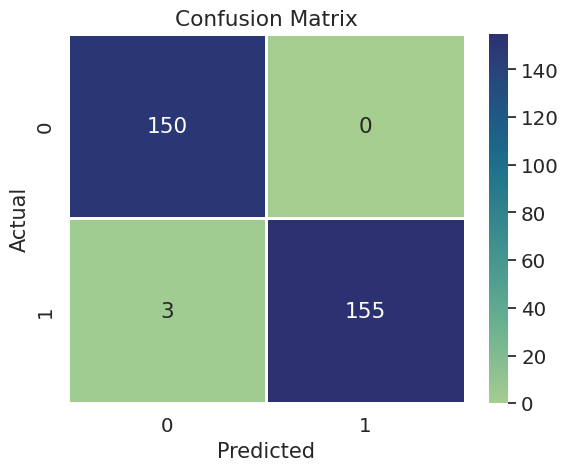

<Figure size 1000x700 with 0 Axes>

In [ ]:
from sklearn import metrics
# Import seaborn library here
import seaborn as sns
import matplotlib.pyplot as plt

# Fill in the parameters for confusion_matrix function
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="crest", linewidth=2)

ax.set_title('Confusion Matrix')
ax.set_xlabel("Predicted", fontsize =15)
ax.set_ylabel("Actual", fontsize=15)

# Print the graph
